Evaluation of local 3D scales of neuronal traces from various cell types.

# Packages importation and general configuration

In [7]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns

import pickle

import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [8]:
from genepy3d.io import swc
from genepy3d.obj import curves, trees
from genepy3d.util import geo, plot as mypl

In [9]:
%matplotlib notebook

# Reading neuronal traces from SWC files

We check local 3d scales for various cell types from NeuroMorpho.Org. The traces were stored in .SWC in "../data/example/swc/". Here we examined three cell types: medium spiny neuron, Purkinje neuron and retia ganglion cell.

In [10]:
# initialize swc importer
filepath = "../data/validation/celltypes/swc/"
f = swc.SWC(filepath,recursive=True)

print("nb. of imported neurons:",len(f.get_neuron_id()))

nb. of imported neurons: 16


In [11]:
# list of neuron names and IDs
f.get_neuron_id()

052317_ECA.CNG                                     0
060415B_ECA.CNG                                    1
101017C_ECA.CNG                                    2
230-12-NBSS.CNG                                    3
231-7-NBSS.CNG                                     4
3817_CPi_PHAL_Z001_app2_split_32.CNG               5
3817_CPi_PHAL_Z001_app2_split_34.CNG               6
5th-instar-LGMD1.CNG                               7
AA0116.CNG                                         8
Badea2011Fig2Ca-R.CNG                              9
c11571.CNG                                        10
CA2-W-P13.CNG                                     11
Purkinje-slice-ageP43-6.CNG                       12
SDB130731c4-hippocampal-CA1-pyramidal-cell.CNG    13
SDB140319c4-hippocampal-CA1-pyramidal-cell.CNG    14
VS1-cobalt.CNG                                    15
dtype: int64

In [16]:
# list of three examples used in the paper
# medium spiny neuron, Purkinje neuron, retina ganglion cell
neunamelst = ["3817_CPi_PHAL_Z001_app2_split_34.CNG",
              "Purkinje-slice-ageP43-6.CNG",
              "Badea2011Fig2Ca-R.CNG"]

# get the corresponding IDs
neuidlst = f.get_neuron_id()[neunamelst].tolist()
print("neuron ID:",neuidlst)

neuron ID: [6, 12, 9]


# Exploring local 3D scales

In [13]:
def get_dim_flag(data,ir,dim="plane_line_flag",thr=0.5):
    """This is support function used to compute dimension decomposition at a specific scale.
    """
    def unity_support(data,dim="plane_line_flag",thr=0.5):
        return np.mean(list(data[dim].values),axis=0)>thr
    
    return np.array(list(data.groupby("nodeid").apply(unity_support,dim=dim,thr=thr)))[:,ir]

## Custom scale color map

In [14]:
upper = 160 # upper scale, based on the maximal scale (see local_3d_scale_cell_types_process.ipynb)

# custom colorbar
mycmp = cm.get_cmap('rainbow')
fig, ax = plt.subplots(figsize=(1, 3))
fig.subplots_adjust(right=0.25)

norm = mpl.colors.Normalize(vmin=0, vmax=upper)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=mycmp,
                                norm=norm,
                                orientation='vertical')

cb1.set_ticks(range(0,upper+1,20));
ax.set_yticklabels(cb1.get_ticks(),fontsize=15);
cb1.set_label('scale (µm)',fontsize=15);

<IPython.core.display.Javascript object>

## Choose a neuron

In [27]:
# load results
# ix = 1
# neuid = neuidlst[ix]
neuid = 5
print("neuron id:",neuid)
newneuron, df_br, df_lf, df_sp = tuple(np.load("../data/validation/celltypes/result/neuron_"+str(neuid)+".npy",allow_pickle=True))

# parameters below were reused from local_3d_scale_cell_types_process.ipynb
maxscale_lst = [102,89,161]
scalestep_lst = [5, 4, 8]
scalerange = np.arange(1,maxscale_lst[ix],scalestep_lst[ix])
print("scale range:",scalerange)

neuron id: 5
scale range: [ 1  5  9 13 17 21 25 29 33 37 41 45 49 53 57 61 65 69 73 77 81 85]


## Comparision between 3 modes of decompositions

Three modes nodes, longest branch, leaf in first, second and third orders were compared.

### Mean

In [28]:
rootcoors = newneuron.get_coordinates(newneuron.get_root()).values

fig, axes = plt.subplots(3, 1, subplot_kw=dict(projection='3d'),figsize=(6,14))

for i in [0,1,2]:
    ax = axes[i]
    if i==0:
        meandf = df_br.groupby("nodeid")["local_scale"].mean()
    elif i==1:
        meandf = df_sp.groupby("nodeid")["local_scale"].mean()
    else:
        meandf = df_lf.groupby("nodeid")["local_scale"].mean()
    
    coors = newneuron.get_coordinates(meandf.index.values).values
    local_scale = meandf.values
    pl = ax.scatter(coors[:,0],
                    coors[:,1],
                    coors[:,2],
                    c=local_scale,s=10,cmap="rainbow",vmin=local_scale.min(),vmax=upper)

    ax.plot(rootcoors[:,0],
            rootcoors[:,1],
            rootcoors[:,2],'o',
            c="black",ms=20,markeredgewidth=0.,alpha=0.7)

    para = mypl.fix_equal_axis(coors)
    ax.set_xlim(para["xmin"],para["xmax"]);
    ax.set_ylim(para["ymin"],para["ymax"]);
    ax.set_zlim(para["zmin"],para["zmax"]);
    ax.view_init(azim=-83,elev=57)
    ax.dist = 8
    ax.axis("off");
    
# fig.colorbar(pl, ax=axes, shrink=0.2, location="left")
    
plt.tight_layout();

<IPython.core.display.Javascript object>

### Stdev

<IPython.core.display.Javascript object>


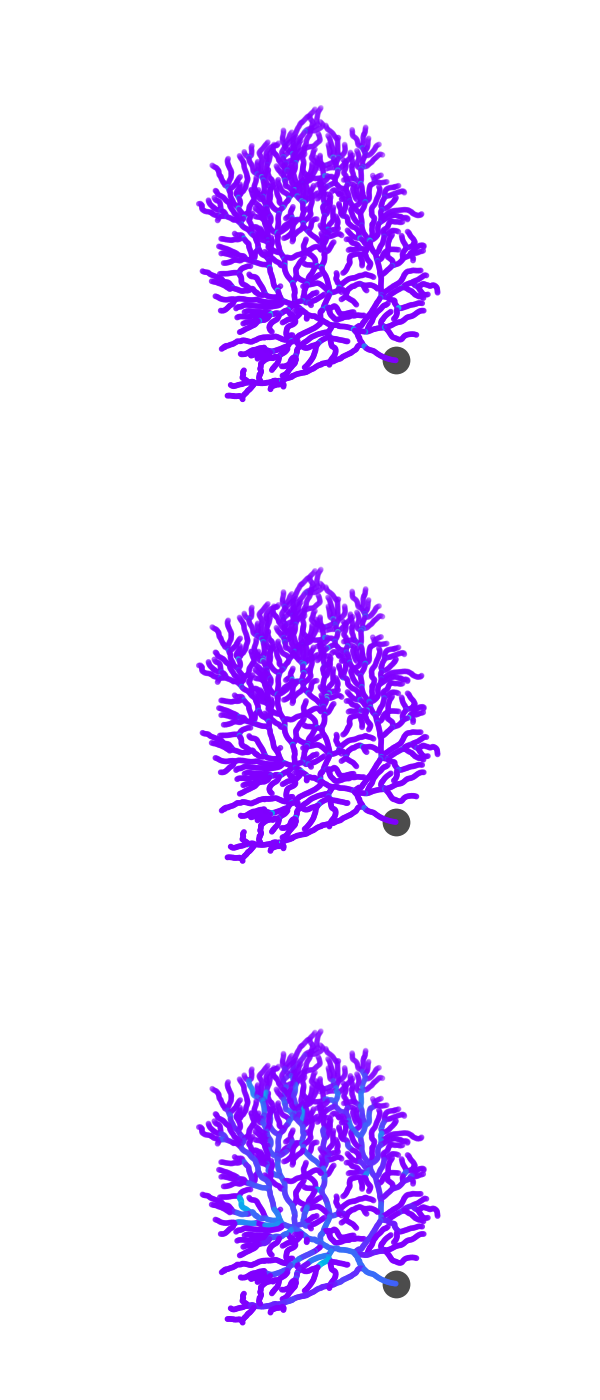

In [29]:
rootcoors = newneuron.get_coordinates(newneuron.get_root()).values

fig, axes = plt.subplots(3, 1, subplot_kw=dict(projection='3d'),figsize=(6,14))

for i in [0,1,2]:
    ax = axes[i]
    if i==0:
        meandf = df_br.groupby("nodeid")["local_scale"].std()
    elif i==1:
        meandf = df_sp.groupby("nodeid")["local_scale"].std()
    else:
        meandf = df_lf.groupby("nodeid")["local_scale"].std()
    
    meandf.fillna(0,inplace=True)
    
    coors = newneuron.get_coordinates(meandf.index.values).values
    local_scale = meandf.values
    pl = ax.scatter(coors[:,0],
                    coors[:,1],
                    coors[:,2],
                    c=local_scale,s=10,cmap="rainbow",vmin=local_scale.min(),vmax=upper)

    ax.plot(rootcoors[:,0],
            rootcoors[:,1],
            rootcoors[:,2],'o',
            c="black",ms=20,markeredgewidth=0.,alpha=0.7)

    para = mypl.fix_equal_axis(coors)
    ax.set_xlim(para["xmin"],para["xmax"]);
    ax.set_ylim(para["ymin"],para["ymax"]);
    ax.set_zlim(para["zmin"],para["zmax"]);
    ax.view_init(azim=-83,elev=57)
    ax.dist = 8
    ax.axis("off");
    
plt.tight_layout();

## Local 3D scale in leaf mode 

Dimension decomposition at some scales (low, medium, high scale) + local 3D scale were shown.

<IPython.core.display.Javascript object>


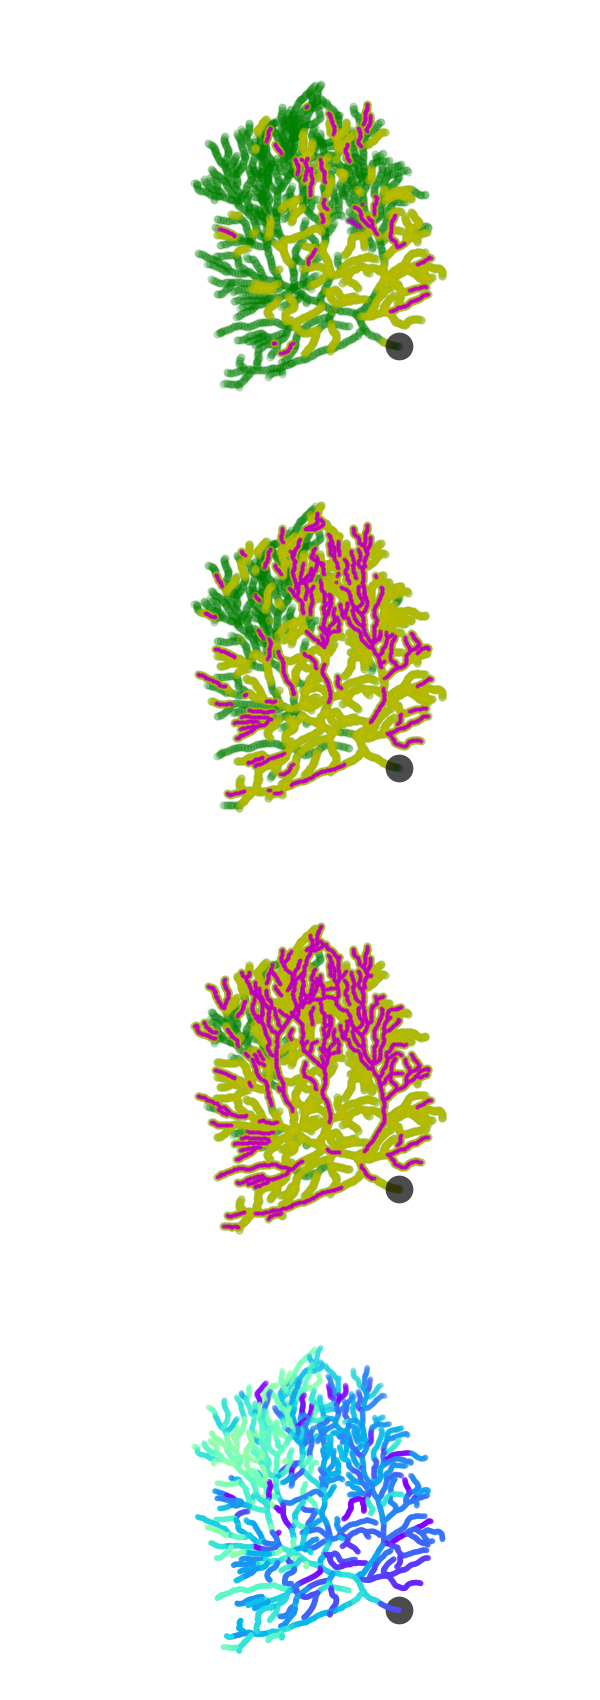

scales: [29 57 85]


In [30]:
rootcoors = newneuron.get_coordinates(newneuron.get_root()).values
meandf = df_lf.groupby("nodeid")["local_scale"].mean()
coors = newneuron.get_coordinates(meandf.index.values).values

fig, axes = plt.subplots(4, 1, subplot_kw=dict(projection='3d'),figsize=(6,17))

irmax = len(df_lf.iloc[0]["plane_line_flag"])-1
ir_lst = [irmax//3, 2*irmax//3, irmax] # low, medium, high scale
print("scales:",scalerange[ir_lst])

for i in range(4):
    ax = axes[i]
    
    if i < 3:
        ir = ir_lst[i]
        
        planeline_flag = get_dim_flag(data=df_lf,ir=ir,dim="plane_line_flag",thr=0.5)
        line_flag = get_dim_flag(data=df_lf,ir=ir,dim="line_flag",thr=0.5)
        threed_flag = get_dim_flag(data=df_lf,ir=ir,dim="threed_flag",thr=0.5)
        
        ax.plot(coors[:,0],
                   coors[:,1],
                   coors[:,2],'o',
                   c="green",ms=5,alpha=0.2)

        ax.plot(coors[planeline_flag,0],
                   coors[planeline_flag,1],
                   coors[planeline_flag,2],'o',
                   c="y",ms=5,alpha=0.3)

        ax.plot(coors[line_flag,0],
                   coors[line_flag,1],
                   coors[line_flag,2],'o',
                   c="m",ms=2,alpha=0.7)
    
    else:
        local_scale = meandf.values
        pl = ax.scatter(coors[:,0],
                        coors[:,1],
                        coors[:,2],
                        c=local_scale,s=10,cmap="rainbow",vmin=local_scale.min(),vmax=upper)
        
    ax.plot(rootcoors[:,0],
            rootcoors[:,1],
            rootcoors[:,2],'o',
            c="black",ms=20,markeredgewidth=0.,alpha=0.7)
    
    para = mypl.fix_equal_axis(coors)
    ax.set_xlim(para["xmin"],para["xmax"]);
    ax.set_ylim(para["ymin"],para["ymax"]);
    ax.set_zlim(para["zmin"],para["zmax"]);
    ax.view_init(azim=-83,elev=57)
    ax.dist = 7
    ax.axis("off");
    
plt.tight_layout();

## Comparision with others measurements

### Local 3D scale

<IPython.core.display.Javascript object>


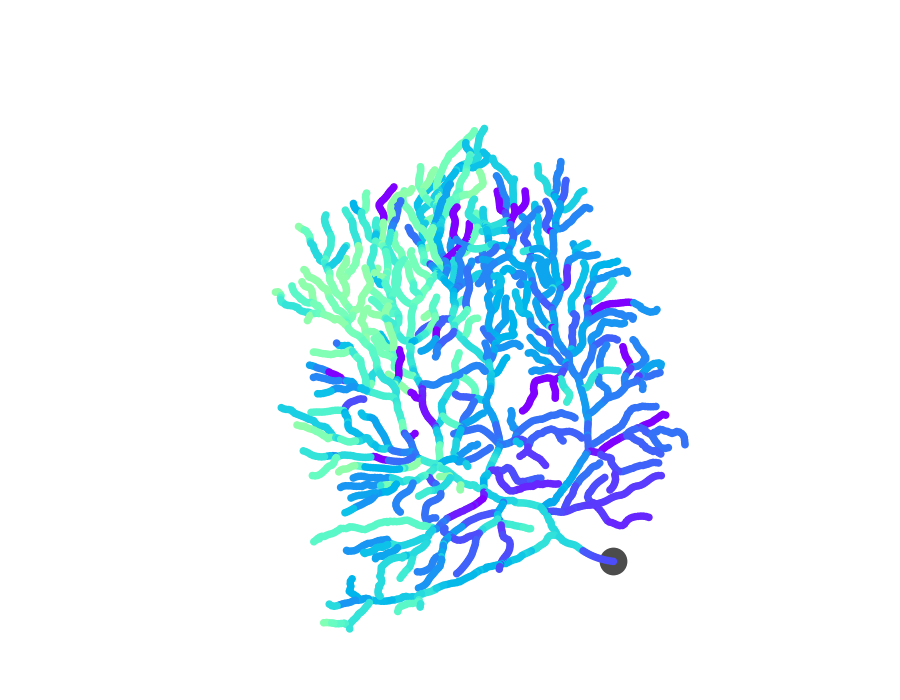

In [37]:
meandf = df_lf.groupby("nodeid")["local_scale"].mean()

coors = newneuron.get_coordinates(meandf.index.values).values
rootcoors = newneuron.get_coordinates(newneuron.get_root()).values

fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='3d'),figsize=(9,7))

local_scale = np.abs(meandf.values)
pl = ax.scatter(coors[:,0],
                coors[:,1],
                coors[:,2],
                c=local_scale,s=20,cmap="rainbow",vmax=upper,alpha=1.)

ax.plot(rootcoors[:,0],
        rootcoors[:,1],
        rootcoors[:,2],'o',
        c="black",ms=20,markeredgewidth=0.,alpha=0.7)

para = mypl.fix_equal_axis(coors)
ax.set_xlim(para["xmin"],para["xmax"]);
ax.set_ylim(para["ymin"],para["ymax"]);
ax.set_zlim(para["zmin"],para["zmax"]);
ax.view_init(azim=-83,elev=57)
ax.dist = 7
ax.axis("off");

# fig.colorbar(pl, ax=ax, shrink=0.4)
    
plt.tight_layout();

In [38]:
fig.savefig("../localfiles/figures/validation/local_scale_examples/purkinje_l3ds.png",dpi=300)

### Curvature

<IPython.core.display.Javascript object>


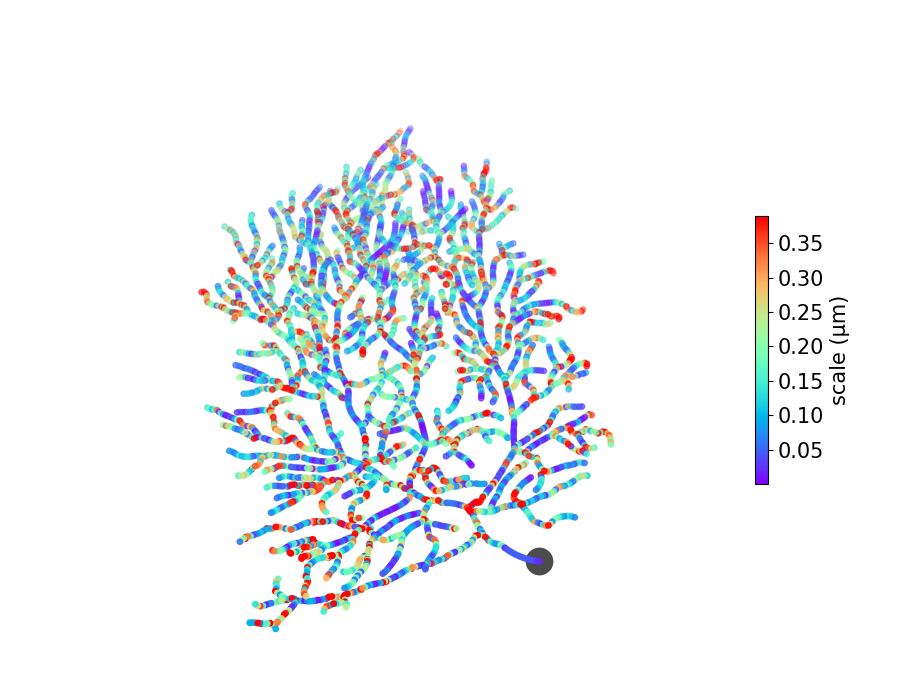

In [32]:
meandf = df_lf.groupby("nodeid")["curvature"].mean()

coors = newneuron.get_coordinates(meandf.index.values).values
rootcoors = newneuron.get_coordinates(newneuron.get_root()).values

fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='3d'),figsize=(9,7))

local_scale = meandf.values

pl = ax.scatter(coors[:,0],
                coors[:,1],
                coors[:,2],
                c=local_scale,s=15,cmap="rainbow",vmax=np.percentile(meandf,90))

ax.plot(rootcoors[:,0],
        rootcoors[:,1],
        rootcoors[:,2],'o',
        c="black",ms=20,markeredgewidth=0.,alpha=0.7)

para = mypl.fix_equal_axis(coors)
ax.set_xlim(para["xmin"],para["xmax"]);
ax.set_ylim(para["ymin"],para["ymax"]);
ax.set_zlim(para["zmin"],para["zmax"]);
ax.view_init(azim=-83,elev=57)
ax.dist = 7

cb1 = fig.colorbar(pl, ax=ax, shrink=0.4)
cb1.set_label('scale (µm)',fontsize=15);
cb1.set_ticks(np.arange(0,np.percentile(meandf,90)+1,0.05));
cb1.ax.tick_params(labelsize=15)

ax.axis("off");
    
plt.tight_layout();

In [33]:
fig.savefig("../localfiles/figures/validation/local_scale_examples/purkinje_curvature.png",dpi=300)

### Torsion

<IPython.core.display.Javascript object>


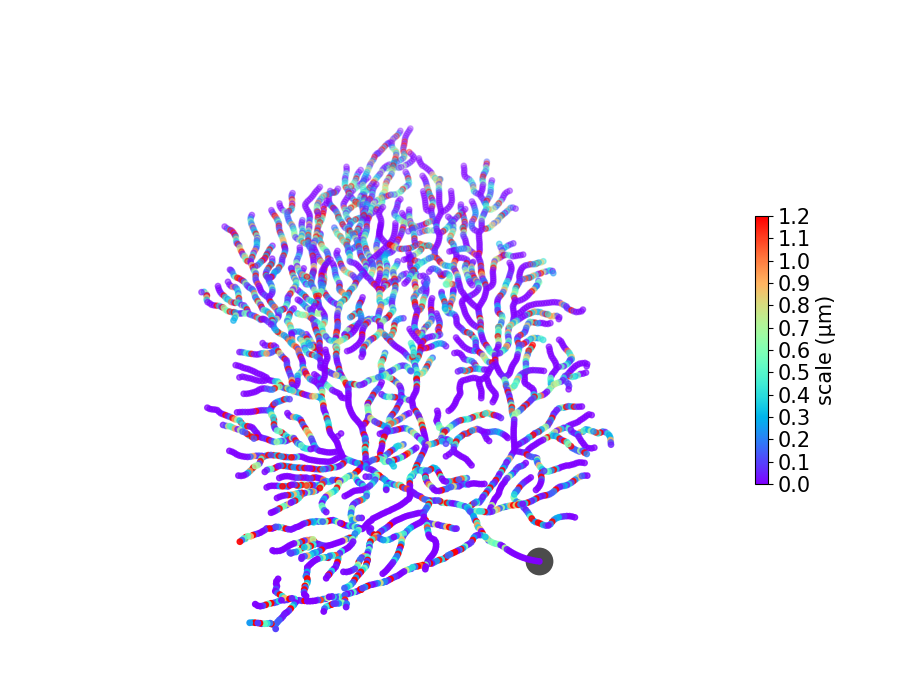

In [34]:
meandf = df_lf.groupby("nodeid")["torsion"].mean()

coors = newneuron.get_coordinates(meandf.index.values).values
rootcoors = newneuron.get_coordinates(newneuron.get_root()).values

fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='3d'),figsize=(9,7))

local_scale = np.abs(meandf.values)
pl = ax.scatter(coors[:,0],
                coors[:,1],
                coors[:,2],
                c=local_scale,s=15,cmap="rainbow",vmax=np.percentile(local_scale,90))

ax.plot(rootcoors[:,0],
        rootcoors[:,1],
        rootcoors[:,2],'o',
        c="black",ms=20,markeredgewidth=0.,alpha=0.7)

para = mypl.fix_equal_axis(coors)
ax.set_xlim(para["xmin"],para["xmax"]);
ax.set_ylim(para["ymin"],para["ymax"]);
ax.set_zlim(para["zmin"],para["zmax"]);
ax.view_init(azim=-83,elev=57)
ax.dist = 7

cb1= fig.colorbar(pl, ax=ax, shrink=0.4)
cb1.set_label('scale (µm)',fontsize=15);
cb1.set_ticks(np.arange(0,np.percentile(local_scale,90)+1,0.1));
cb1.ax.tick_params(labelsize=15)

ax.axis("off");
    
plt.tight_layout();

In [35]:
fig.savefig("../localfiles/figures/validation/local_scale_examples/purkinje_torsion_abs.png",dpi=300)

## Making movie

In [28]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

<IPython.core.display.Javascript object>


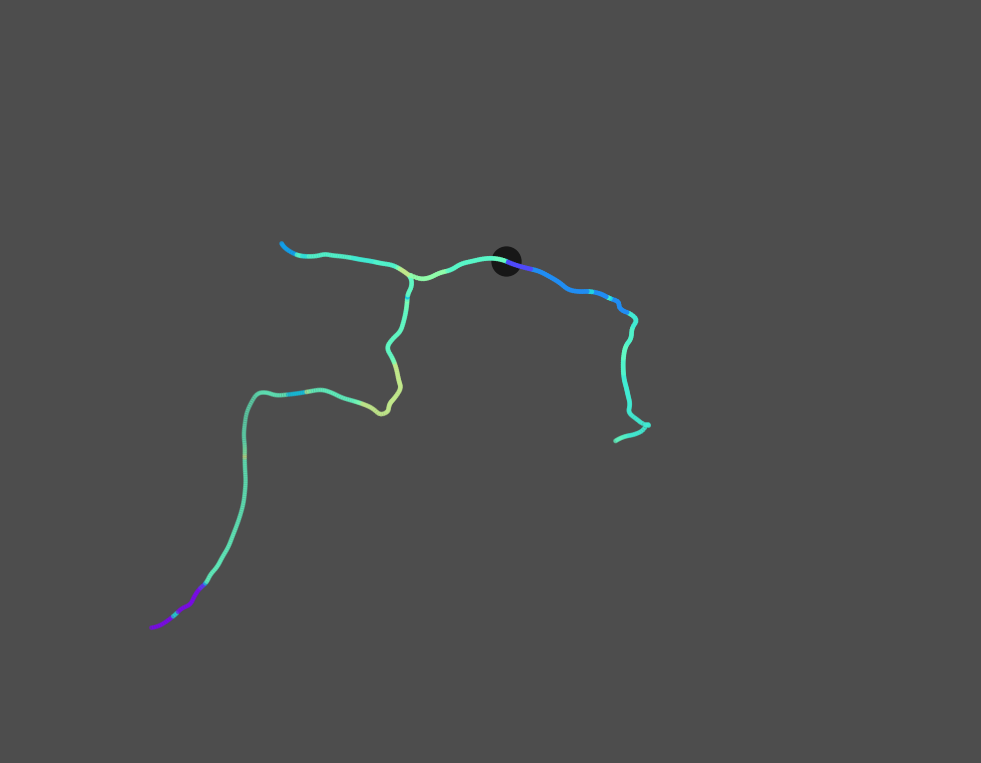

t:   0%|          | 0/80 [00:00<?, ?it/s, now=None]

ite: 0
Moviepy - Building video matplotlib.mp4.
Moviepy - Writing video matplotlib.mp4

ite: 0


t:   4%|▍         | 3/80 [00:00<00:06, 11.04it/s, now=None]

ite: 1
ite: 2


t:   8%|▊         | 6/80 [00:00<00:06, 10.66it/s, now=None]

ite: 3
ite: 4
ite: 5


t:  10%|█         | 8/80 [00:00<00:06, 10.95it/s, now=None]

ite: 6
ite: 7
ite: 8


t:  15%|█▌        | 12/80 [00:01<00:05, 11.53it/s, now=None]

ite: 9
ite: 10
ite: 11


t:  18%|█▊        | 14/80 [00:01<00:06,  9.55it/s, now=None]

ite: 12
ite: 13


t:  20%|██        | 16/80 [00:01<00:07,  8.28it/s, now=None]

ite: 14
ite: 15


t:  24%|██▍       | 19/80 [00:01<00:06,  9.07it/s, now=None]

ite: 16
ite: 17
ite: 18


t:  26%|██▋       | 21/80 [00:02<00:06,  9.09it/s, now=None]

ite: 19
ite: 20


t:  30%|███       | 24/80 [00:02<00:06,  9.12it/s, now=None]

ite: 21
ite: 22
ite: 23


t:  32%|███▎      | 26/80 [00:02<00:05,  9.77it/s, now=None]

ite: 24
ite: 25
ite: 26


t:  38%|███▊      | 30/80 [00:02<00:04, 10.82it/s, now=None]

ite: 27
ite: 28
ite: 29


t:  40%|████      | 32/80 [00:03<00:05,  9.21it/s, now=None]

ite: 30
ite: 31


t:  42%|████▎     | 34/80 [00:03<00:05,  8.62it/s, now=None]

ite: 32
ite: 33


t:  46%|████▋     | 37/80 [00:03<00:04,  9.30it/s, now=None]

ite: 34
ite: 35
ite: 36


t:  50%|█████     | 40/80 [00:04<00:04,  9.12it/s, now=None]

ite: 37
ite: 38
ite: 39


t:  52%|█████▎    | 42/80 [00:04<00:04,  7.96it/s, now=None]

ite: 40
ite: 41


t:  55%|█████▌    | 44/80 [00:04<00:04,  7.81it/s, now=None]

ite: 42
ite: 43


t:  59%|█████▉    | 47/80 [00:05<00:03,  8.65it/s, now=None]

ite: 44
ite: 45
ite: 46


t:  61%|██████▏   | 49/80 [00:05<00:03,  8.32it/s, now=None]

ite: 47
ite: 48


t:  64%|██████▍   | 51/80 [00:05<00:03,  8.20it/s, now=None]

ite: 49
ite: 50


t:  66%|██████▋   | 53/80 [00:05<00:03,  8.52it/s, now=None]

ite: 51
ite: 52
ite: 53


t:  70%|███████   | 56/80 [00:06<00:02,  8.73it/s, now=None]

ite: 54
ite: 55


t:  72%|███████▎  | 58/80 [00:06<00:02,  8.56it/s, now=None]

ite: 56
ite: 57


t:  76%|███████▋  | 61/80 [00:06<00:02,  9.24it/s, now=None]

ite: 58
ite: 59


t:  79%|███████▉  | 63/80 [00:06<00:01,  9.32it/s, now=None]

ite: 60
ite: 61
ite: 62


t:  81%|████████▏ | 65/80 [00:07<00:02,  7.09it/s, now=None]

ite: 63
ite: 64


t:  84%|████████▍ | 67/80 [00:07<00:01,  7.64it/s, now=None]

ite: 65
ite: 66


t:  88%|████████▊ | 70/80 [00:07<00:01,  8.68it/s, now=None]

ite: 67
ite: 68
ite: 69


t:  90%|█████████ | 72/80 [00:07<00:00,  8.99it/s, now=None]

ite: 70
ite: 71
ite: 72


t:  94%|█████████▍| 75/80 [00:08<00:00,  8.51it/s, now=None]

ite: 73
ite: 74


t:  98%|█████████▊| 78/80 [00:08<00:00,  8.86it/s, now=None]

ite: 75
ite: 76
ite: 77


ite: 78
ite: 79
Moviepy - Done !
Moviepy - video ready matplotlib.mp4


In [38]:
# this script is used to make a movie
meandf = df_lf.groupby("nodeid")["local_scale"].mean()
coors = newneuron.get_coordinates(meandf.index.values).values
coors_mean = np.mean(coors,axis=0)
newcoors = coors - np.repeat(coors_mean.reshape(-1,3),coors.shape[0],axis=0)
rootcoors = newneuron.get_coordinates(newneuron.get_root()).values
rootcoors = rootcoors - coors_mean

nbfs = 5
elev_root = 0

firsttime = True

fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='3d'),figsize=(9,7),facecolor=(0.3,0.3,0.3))

def make_frame(t):
    
    ite = int(np.round(t*nbfs)) # frame number
    
    print("ite:",ite)
    
    ax.clear()
    
    # newneuron.plot(ax,weights=meandf,
    #                show_branchingnodes=False,show_leaves=False,show_root=False,
    #                point_args={"cmap":mycmp,"vmax":upper},show_cbar=True,cbar_args={"shrink":0.3})

    pl = ax.scatter(newcoors[:,0],newcoors[:,1],newcoors[:,2],c=meandf,cmap=mycmp,vmax=upper,s=5)
    ax.plot(rootcoors[:,0],
            rootcoors[:,1],
            rootcoors[:,2],'o',
            c="black",ms=20,markeredgewidth=0.,alpha=0.7)

    ax.set_facecolor((0.3, 0.3, 0.3))

    cb = fig.colorbar(pl,shrink=0.3)
    
    para = mypl.fix_equal_axis(newcoors)
    ax.set_xlim(para["xmin"],para["xmax"]);
    ax.set_ylim(para["ymin"],para["ymax"]);
    ax.set_zlim(para["zmin"],para["zmax"]);
    ax.view_init(azim=-150,elev=elev_root-ite)
    ax.dist = 7
    ax.axis("off");
    plt.tight_layout();
    
    capture = mplfig_to_npimage(fig)
    cb.remove()  # clear colorbar axes
    
    return capture

animation = VideoClip(make_frame, duration=16)
animation.write_videofile('matplotlib.mp4', fps=nbfs)

In [22]:
mplfig_to_npimage??